<a href="https://colab.research.google.com/github/bagasap10/COMP6577-MachineLearning/blob/main/MidtermML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import package

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# **1. Download and analyse the dataset**

In [82]:
!wget https://raw.githubusercontent.com/bagasap10/COMP6577-MachineLearning/main/mydataset.csv

--2021-04-29 19:54:15--  https://raw.githubusercontent.com/bagasap10/COMP6577-MachineLearning/main/mydataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1738173 (1.7M) [text/plain]
Saving to: ‘mydataset.csv.3’

mydataset.csv.3     100%[===================>]   1.66M  --.-KB/s    in 0.1s    

2021-04-29 19:54:15 (16.7 MB/s) - ‘mydataset.csv.3’ saved [1738173/1738173]



In [116]:
data = pd.read_csv("mydataset.csv")
data


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4196,28,18,2018-07-28,0.20
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10975,3,156,2019-05-21,1.65
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4196,30,107,2019-05-25,1.25
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66344,139.65593,Entire home/apt,6994,29,99,2019-05-07,1.55
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3981,30,101,2019-05-03,1.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11461,36083287,1min to station · Skytree/Tatami hotel/new design,235406925,Sayoko佐代子,NaN,Sumida Ku,35.70862,139.81393,Entire home/apt,21951,1,0,NaN,NaN
11462,36083512,Asakusa Wired house 5pax near by UENO/AKIHABARA,267481408,Hyongsu,NaN,Taito Ku,35.72464,139.78078,Entire home/apt,7747,1,0,NaN,NaN
11463,36084566,东京精品民宿,161702799,Yang,NaN,Toshima Ku,35.73587,139.73397,Private room,56275,1,0,NaN,NaN
11464,36085357,#4 DIRECT ACCESS TO DISNEY IN BUS! 3MIN TO STA...,208189463,Shotaro,NaN,Edogawa Ku,35.66255,139.87236,Entire home/apt,6456,1,0,NaN,NaN


Here we can see the table of each data. To easily discover each datatypes, we use the next function.

In [117]:
for i in data:
  print(i, data[i].dtypes)

id int64
name object
host_id int64
host_name object
neighbourhood_group float64
neighbourhood object
latitude float64
longitude float64
room_type object
price int64
minimum_nights int64
number_of_reviews int64
last_review object
reviews_per_month float64


After discovering the datatypes, we can use .describe to find the min mean max of all the data.

In [85]:
data.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,1.146600e+04,1.146600e+04,0.0,11466.000000,11466.000000,1.146600e+04,11466.000000,11466.000000,9789.000000
mean,2.640545e+07,1.399776e+08,NaN,35.687159,139.734537,1.498470e+04,3.316239,26.028868,2.262540
std,7.565212e+06,8.064289e+07,NaN,0.217853,0.092771,3.327345e+04,7.766766,38.455449,1.744004
min,3.530300e+04,1.519770e+05,NaN,27.072330,139.130020,0.000000e+00,1.000000,0.000000,0.040000
25%,2.215251e+07,5.783171e+07,NaN,35.679620,139.698975,6.026000e+03,1.000000,2.000000,1.000000
50%,2.841873e+07,1.502326e+08,NaN,35.701910,139.729165,1.000700e+04,1.000000,12.000000,2.060000
75%,3.222416e+07,2.135896e+08,NaN,35.724215,139.784270,1.721600e+04,2.000000,32.000000,3.170000
max,3.608660e+07,2.714130e+08,NaN,35.832430,142.202880,1.000046e+06,180.000000,453.000000,51.210000


In [118]:
data.isna().sum()

id                         0
name                       0
host_id                    0
host_name                 16
neighbourhood_group    11466
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
last_review             1677
reviews_per_month       1677
dtype: int64

In [119]:
for i in data:
  if data[i].dtype != object:
    data[i] = data[i].fillna(0)

In [120]:
data.isna().sum()

id                        0
name                      0
host_id                   0
host_name                16
neighbourhood_group       0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
last_review            1677
reviews_per_month         0
dtype: int64

This is the min mean max etc BEFORE we drop any data that have no value.

In [87]:
droppedData = pd.read_csv("mydataset.csv")

for i in droppedData:
  if droppedData[i].dtype != object:
    droppedData[i] = droppedData[i].fillna(0)

droppedData.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month
count,1.146600e+04,1.146600e+04,11466.0,11466.000000,11466.000000,1.146600e+04,11466.000000,11466.000000,11466.000000
mean,2.640545e+07,1.399776e+08,0.0,35.687159,139.734537,1.498470e+04,3.316239,26.028868,1.931624
std,7.565212e+06,8.064289e+07,0.0,0.217853,0.092771,3.327345e+04,7.766766,38.455449,1.798866
min,3.530300e+04,1.519770e+05,0.0,27.072330,139.130020,0.000000e+00,1.000000,0.000000,0.000000
25%,2.215251e+07,5.783171e+07,0.0,35.679620,139.698975,6.026000e+03,1.000000,2.000000,0.530000
50%,2.841873e+07,1.502326e+08,0.0,35.701910,139.729165,1.000700e+04,1.000000,12.000000,1.720000
75%,3.222416e+07,2.135896e+08,0.0,35.724215,139.784270,1.721600e+04,2.000000,32.000000,3.000000
max,3.608660e+07,2.714130e+08,0.0,35.832430,142.202880,1.000046e+06,180.000000,453.000000,51.210000


In [88]:
droppedData.isna().sum()

id                        0
name                      0
host_id                   0
host_name                16
neighbourhood_group       0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
price                     0
minimum_nights            0
number_of_reviews         0
last_review            1677
reviews_per_month         0
dtype: int64

The table shown above is a new revised dataset, which replace the non value data to 0.

The difference can be seen on reviews_per_month subject.

# **2. Probability Density Function**

In probability theory, a probability density function (PDF), or density of a continuous random variable, is a function that describes the relative likelihood for this random variable to take on a given value.

Check for NaN

In [89]:
for i in droppedData:
  print(i, data[i].isna().values.any())

id False
name False
host_id False
host_name True
neighbourhood_group True
neighbourhood False
latitude False
longitude False
room_type False
price False
minimum_nights False
number_of_reviews False
last_review True
reviews_per_month True


After we check if the data has NaN value, we can see that host_name, last_review, reviews_per_month has a NaN value. We could ignore host_name because it doesnt correlate with the required dataset for linear regression.

**Kernel Density Estimation**

Kernel density estimation is a non-parametric way to estimate the probability density function of a random variable.

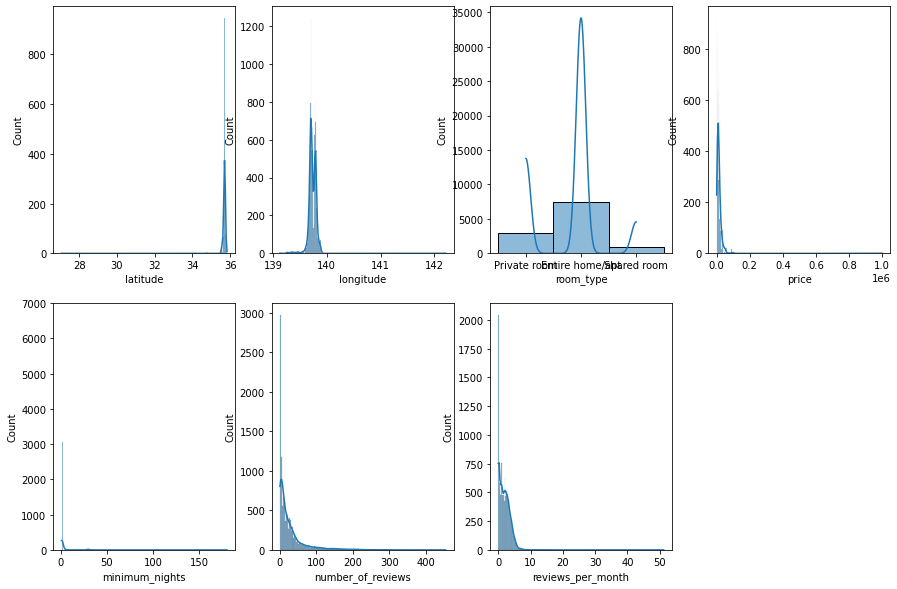

In [90]:
plt.figure(figsize=(15,10))

subject = ['latitude','longitude','room_type','price','minimum_nights','number_of_reviews','reviews_per_month']

for i in range(1,8):
  plt.subplot(2,4,i)
  sns.histplot(droppedData[subject[i-1]], kde=True)

# 3. 

Neighbourhood group, host_id, and id have no correlation with the linear regression model because of the datatype, so we could drop it.

In [91]:
droppedData.pop("id")
droppedData.pop("host_id")
droppedData.pop("neighbourhood_group")

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11461    0.0
11462    0.0
11463    0.0
11464    0.0
11465    0.0
Name: neighbourhood_group, Length: 11466, dtype: float64

**Visualizing data with seaborn**

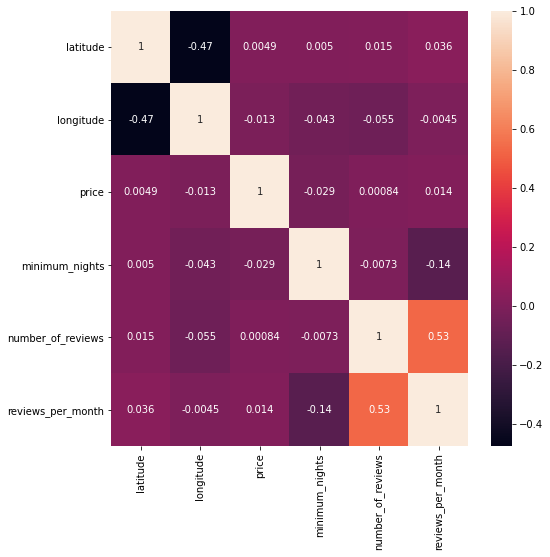

In [92]:
plt.figure(figsize=(8,8))
sns.heatmap(droppedData.corr(), annot = True)

By looking at the graph, we can see which subject that can be correlated into correlation matrix. We can determine which is Y and the predictor. This correlation matrix starts at 0 to 1, we have to absolute minus value.



> **a.** Although there is much more subject that have more correlation to other subjects. Y that i chose is **reviews_per_month** since it is more reasonable to predict because of many subjects that are closer to 1.

> **b.** The predictor of Y would be **minimum_nights** and **number_of_reviews** because its closer to 1. 

> **c.** I did not chose **latitude** and **longitude** because its closer to 0, which means have less correlation.










# **4. Train dataset with Linear Regression**

After making the correlation matrix, we can implement the Y and its predictors. Y is Y and predictors is X.

In [93]:
X = droppedData[[ "minimum_nights", "number_of_reviews"]]
Y = droppedData["reviews_per_month"]

XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.5 , random_state = 2301869494)

train_test_split is for splitting the arrays into random train and test subsets. Test_size = 0.2 tells that we are working 20% of the data with a random state of 42.

In [94]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)

theta = np.zeros(4)
theta = LRM.coef_
theta = np.insert(theta, 0, LRM.intercept_, axis=0)

for i, data in enumerate(theta):
  print("Theta ",i,":",data)

LRM.score(XTest, YTest)

Theta  0 : 1.3826848272347787
Theta  1 : -0.029935345809743545
Theta  2 : 0.02394996156375068


0.3093963416139258

# **5. Evaluation Metrics**

In [95]:
print("R2  :", r2_score(YTest, prediction))
print("MAE :", mean_absolute_error(YTest, prediction))
print("MSE :", mean_squared_error(YTest, prediction))

R2  : 0.3093963416139258
MAE : 1.064295382367319
MSE : 2.3811963178718667


By the value of the R2, it seems like the data is underfitting. But the value of MAE and MSE doesnt confirm that the data is overfitting neither underfitting.

# **6. Overview**

## a.

In [96]:
multivar = []
univar = []

These arrays are made to contain r2 score, mae, mse from multivariate linear regression and univariate linear regression.

**MULTIVARIATE**

In [97]:
minimum_nights = [ 28, 3, 30, 29, 30]
number_of_reviews = [ 18, 156, 107, 99 ,101]

rpm = np.zeros(4)

for i in range(4):
  rpm[i] = theta[0] + theta[1] * minimum_nights[i] + theta[2] * number_of_reviews[i]
  print("Reviews per Month ",i+1,": ", rpm[i])

multivar.append(r2_score(YTest, prediction))
multivar.append(mean_absolute_error(YTest, prediction)) 
multivar.append(mean_squared_error(YTest, prediction))


Reviews per Month  1 :  0.9755944527094718
Reviews per Month  2 :  5.029072793750654
Reviews per Month  3 :  3.047270340263795
Reviews per Month  4 :  2.8856059935635336


**UNIVARIATE**

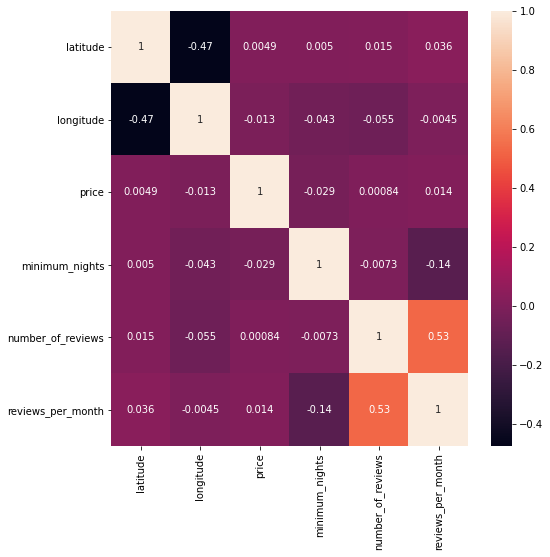

In [98]:
plt.figure(figsize=(8,8))
sns.heatmap(droppedData.corr(), annot = True)

From the correlation matrix shown, I take **longitude**, the weakest relationship possible to prove one variable is not effective. And number of_reviews has the strongest relationship with reviews_per_month with 0.53.




In [99]:
X = droppedData[["longitude"]]
Y = droppedData["reviews_per_month"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.5, random_state = 2301869494)

In [100]:
LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)

theta = np.zeros(4)
theta = LRM.coef_
theta = np.insert(theta, 0, LRM.intercept_, axis=0)

for i, data in enumerate(theta):
  print("Theta ",i,":",data)

LRM.score(XTest, YTest)

Theta  0 : 11.311060786946031
Theta  1 : -0.06732742028720048


-0.0009192366832853071

In [101]:
number_of_reviews = [ 18, 156, 107, 99 ,101]
for i in range(4):
  print("Reviews per Month", i+1, ": ", theta[0] + theta[1] * number_of_reviews[i])

univar.append(r2_score(YTest, prediction))
univar.append(mean_absolute_error(YTest, prediction))
univar.append(mean_squared_error(YTest, prediction))

for i in range(3):
  print(univar[i])

Reviews per Month 1 :  10.099167221776423
Reviews per Month 2 :  0.8079832221427559
Reviews per Month 3 :  4.10702681621558
Reviews per Month 4 :  4.645646178513183
-0.0009192366832853072
1.3324201650940004
3.451162141896668


**Compare Univariate with Multivariate**

In [102]:
print("Univariate    Linear Regression R2 Score  : ", univar[0])
print("Multivariate  Linear Regression R2 Score  : ", multivar[0])
print("")
print("Univariate    Linear Regression Mean Absolute Error  : ", univar[1])
print("Multivariate  Linear Regression Mean Absolute Error  : ", multivar[1])
print("")
print("Univariate    Linear Regression Mean Squared Error  : ", univar[2])
print("Multivariate  Linear Regression Mean Squared Error  : ", multivar[2])

Univariate    Linear Regression R2 Score  :  -0.0009192366832853072
Multivariate  Linear Regression R2 Score  :  0.3093963416139258

Univariate    Linear Regression Mean Absolute Error  :  1.3324201650940004
Multivariate  Linear Regression Mean Absolute Error  :  1.064295382367319

Univariate    Linear Regression Mean Squared Error  :  3.451162141896668
Multivariate  Linear Regression Mean Squared Error  :  2.3811963178718667


## b.

In [122]:
data = pd.read_csv("mydataset.csv")

for i in data:
  if data[i].dtype != object:
    data[i] = data[i].fillna(0)


X = data[["longitude", "latitude", "minimum_nights", "number_of_reviews"]]
Y = data["reviews_per_month"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.5, random_state = 2301869494)

LRM = LinearRegression().fit(XTrain, YTrain)
prediction = LRM.predict(XTest)
print(prediction)
print("")

theta = np.zeros(4)
theta = LRM.coef_
theta = np.insert(theta, 0, LRM.intercept_, axis = 0)

for i, data in enumerate(theta):
  print("Theta ", i, ":", data)
print("")

LRM.score(XTest, YTest)

longitude = [ 139.71203, 139.82596, 139.65810, 139.65593, 139.65832]
latitude = [ 35.67152, 35.71721, 35.74267, 35.66344, 35.74264]
minimum_nights = [ 28, 3, 30, 29, 30]
number_of_reviews = [ 18, 156, 107, 99 ,101]

rpm = np.zeros(4)
for i in range(4):
  rpm[i] = theta[0] + theta[1] * minimum_nights[i] + theta[2] * number_of_reviews[i]
  print("Reviews per Month ", i+1, ": ", rpm[i])

print("")

print("R2  :", r2_score(YTest, prediction))
print("MAE :", mean_absolute_error(YTest, prediction))
print("MSE :", mean_squared_error(YTest, prediction))


[2.19255988 4.21081463 1.9542689  ... 5.27075344 1.38616444 1.31907716]

Theta  0 : -132.73032701154807
Theta  1 : 0.8536583370836226
Theta  2 : 0.4153730251709222
Theta  3 : -0.02946368289206097
Theta  4 : 0.024039997644136446

Reviews per Month  1 :  -101.35117912013004
Reviews per Month  2 :  -65.37116007363335
Reviews per Month  3 :  -62.675663205750716
Reviews per Month  4 :  -66.85230574420171

R2  : 0.31145907773777237
MAE : 1.0616226960110113
MSE : 2.3740840189386065


Using too much variable can cause irrelevant data to be used.